In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
np.__version__ , pd.__version__

('1.17.4', '0.25.3')

In [4]:
data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\application_train.csv')

In [5]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# 欄位資訊
house_data = data.iloc[0].index[44:91]
extr_file_data = data.iloc[0].index[96:116]
data_column= data.iloc[0].count()

print("application_train共有 " + str(data_column) + " 欄位" +"\n"
     "房屋資料有 " + str(len(house_data)) + " 欄位" + "\n"
     "補充文件 " + str(len(extr_file_data)) + " 欄位")

application_train共有 121 欄位
房屋資料有 47 欄位
補充文件 20 欄位


In [8]:
# MISSING VALUE TABLE
miss_value_percent = data.isnull().sum().sort_values(ascending=False)/len(data)
miss_value_percent = miss_value_percent * 100
pd.set_option('display.max_rows', None)
miss_value_count = data.isnull().sum().sort_values(ascending=False)
miss_value =pd.DataFrame( {'count':miss_value_count ,'precent': miss_value_percent} )
print("空值共有 " + str(miss_value_count[miss_value_count>0].count()) + " 個欄位")
print(miss_value[miss_value_count>0])


空值共有 67 個欄位
                               count    precent
COMMONAREA_MEDI               214865  69.872297
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MODE               214865  69.872297
NONLIVINGAPARTMENTS_MODE      213514  69.432963
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MEDI         210199  68.354953
LIVINGAPARTMENTS_MODE         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
FLOORSMIN_MEDI                208642  67.848630
FLOORSMIN_MODE                208642  67.848630
FLOORSMIN_AVG                 208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
OWN_CAR_AGE                   202929  65.990810
LANDAREA_MODE                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
LANDAREA_MEDI               

In [9]:
#看有無重複值
data.apply(lambda x:x.unique().shape[0],axis=0).sort_values(ascending=False)

SK_ID_CURR                      307511
EXT_SOURCE_2                    119832
EXT_SOURCE_1                    114585
DAYS_BIRTH                       17460
DAYS_REGISTRATION                15688
AMT_ANNUITY                      13673
DAYS_EMPLOYED                    12574
DAYS_ID_PUBLISH                   6168
AMT_CREDIT                        5603
LIVINGAREA_MODE                   5302
LIVINGAREA_MEDI                   5282
LIVINGAREA_AVG                    5200
TOTALAREA_MODE                    5117
BASEMENTAREA_MODE                 3842
BASEMENTAREA_AVG                  3781
DAYS_LAST_PHONE_CHANGE            3774
BASEMENTAREA_MEDI                 3773
LANDAREA_MODE                     3564
LANDAREA_MEDI                     3561
LANDAREA_AVG                      3528
NONLIVINGAREA_MODE                3328
NONLIVINGAREA_MEDI                3324
NONLIVINGAREA_AVG                 3291
COMMONAREA_MEDI                   3203
COMMONAREA_AVG                    3182
COMMONAREA_MODE          

In [10]:
# 欄位是物件有哪些
data_object = data.columns[data.dtypes=="object"]
data_object

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [11]:
# 欄位是int有哪些
data_int = data.columns[data.dtypes=="int64"]
data_int

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [12]:
# 欄位是float有哪些
data_float = data.columns[data.dtypes=="float64"]
data_float

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [13]:
data["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

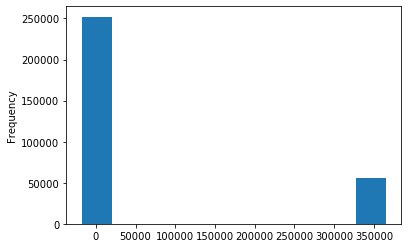

In [14]:
data["DAYS_EMPLOYED"].plot.hist()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

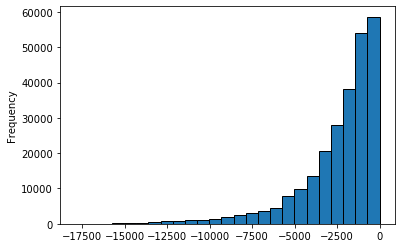

In [15]:
# 把異常值換成空值
data['DAYS_EMPLOYED_ANOM'] = data["DAYS_EMPLOYED"] == 365243
data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
data["DAYS_EMPLOYED"].plot.hist(edgecolor = 'k', bins = 25)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

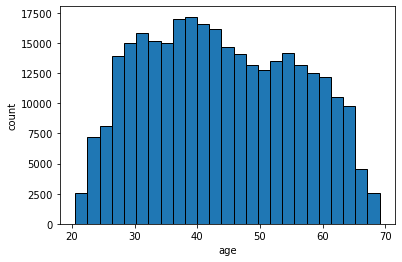

In [16]:
# 客戶的年齡分布
client_age = (data["DAYS_BIRTH"]/-365)
client_age.plot.hist(edgecolor = 'k', bins = 25)
plt.xlabel("age"),plt.ylabel("count")
plt.show

c:\program files\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\program files\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'AMT_GOODS_PRICE')

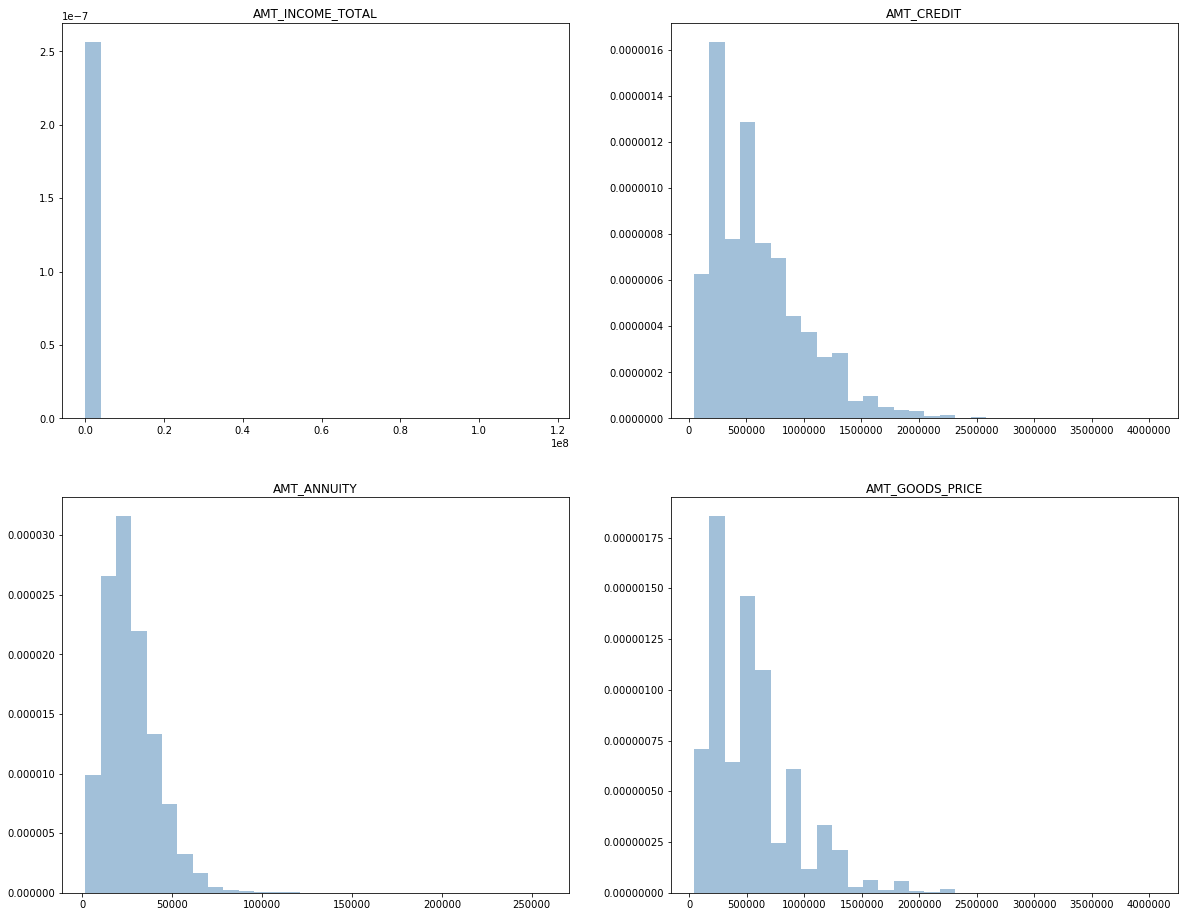

In [17]:
# 客戶收入、信貸金額、貸款年金、產品金額分布
plt.figure(figsize = (20, 16))
plt.subplot(2,2,1)
plt.hist(data["AMT_INCOME_TOTAL"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title("AMT_INCOME_TOTAL")
plt.subplot(2,2,2)
plt.hist(data["AMT_CREDIT"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title("AMT_CREDIT")
plt.subplot(2,2,3)
plt.hist(data["AMT_ANNUITY"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title("AMT_ANNUITY")
plt.subplot(2,2,4)
plt.hist(data["AMT_GOODS_PRICE"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title("AMT_GOODS_PRICE")

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

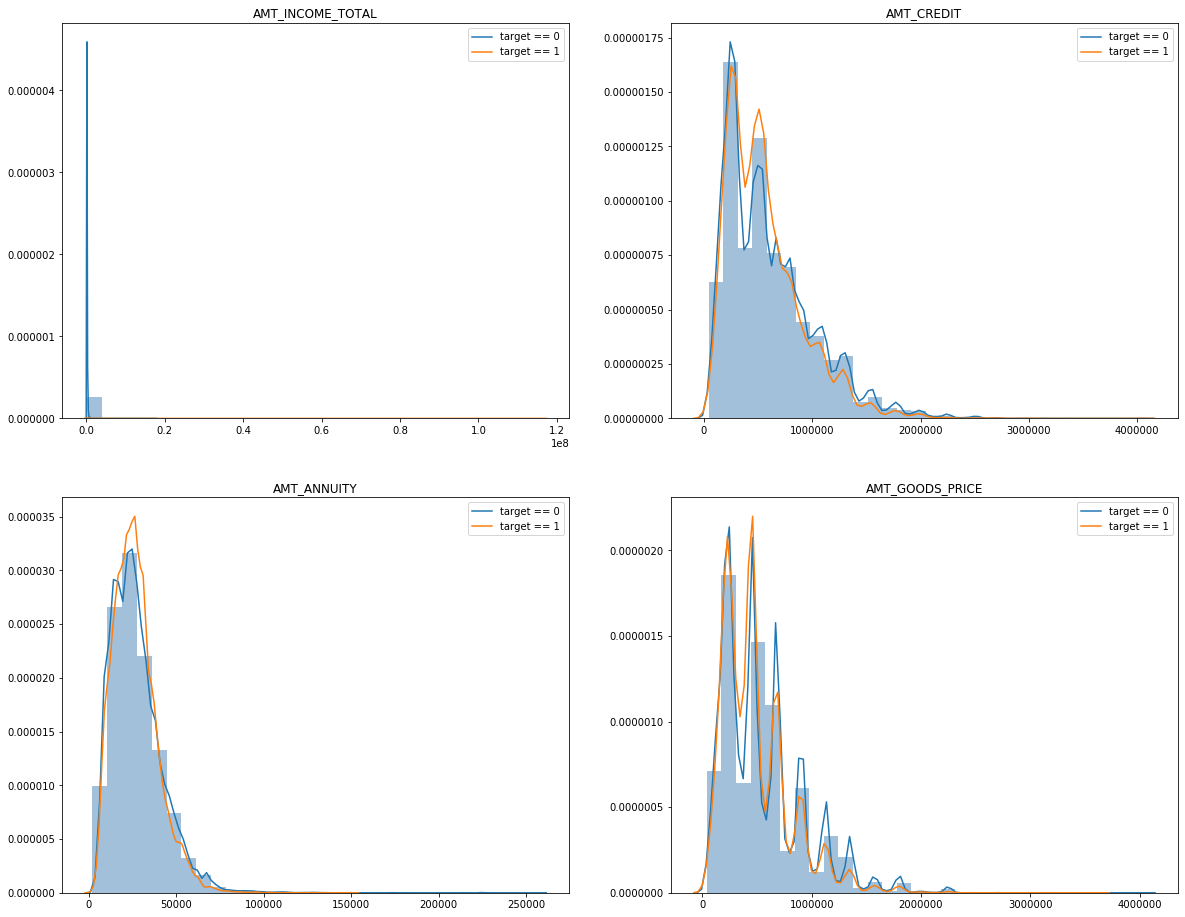

In [57]:
# kdeplot套件空值無法畫，須新增欄位
AMT_ANNUITY_noNull = data["AMT_ANNUITY"].fillna(data["AMT_ANNUITY"].mean())
AMT_GOODS_PRICE_noNull = data["AMT_GOODS_PRICE"].fillna(data["AMT_GOODS_PRICE"].mean())
data['AMT_ANNUITY_noNull'] = AMT_ANNUITY_noNull
data['AMT_GOODS_PRICE_noNull'] = AMT_GOODS_PRICE_noNull

# 客戶收入、信貸金額、貸款年金、產品金額分布
plt.figure(figsize = (20, 16))
plt.subplot(2,2,1)
plt.hist(data["AMT_INCOME_TOTAL"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
# 還款分布
sns.kdeplot(data.loc[data['TARGET'] == 0, 'AMT_INCOME_TOTAL'] , label = 'target == 0')
sns.kdeplot(data.loc[data['TARGET'] == 1, 'AMT_INCOME_TOTAL'] , label = 'target == 1')
plt.title("AMT_INCOME_TOTAL")

plt.subplot(2,2,2)
plt.hist(data["AMT_CREDIT"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
# 還款分布
sns.kdeplot(data.loc[data['TARGET'] == 0, 'AMT_CREDIT'] , label = 'target == 0')
sns.kdeplot(data.loc[data['TARGET'] == 1, 'AMT_CREDIT'] , label = 'target == 1')
plt.title("AMT_CREDIT")

plt.subplot(2,2,3)
plt.hist(data["AMT_ANNUITY"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
# 還款分布
sns.kdeplot(data.loc[data['TARGET'] == 0, 'AMT_ANNUITY_noNull'] , label = 'target == 0')
sns.kdeplot(data.loc[data['TARGET'] == 1, 'AMT_ANNUITY_noNull'] , label = 'target == 1')
plt.title("AMT_ANNUITY")

plt.subplot(2,2,4)
plt.hist(data["AMT_GOODS_PRICE"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
# 還款分布
sns.kdeplot(data.loc[data['TARGET'] == 0, 'AMT_GOODS_PRICE_noNull'] , label = 'target == 0')
sns.kdeplot(data.loc[data['TARGET'] == 1, 'AMT_GOODS_PRICE_noNull'] , label = 'target == 1')
plt.title("AMT_GOODS_PRICE")

Text(0.5, 1.0, 'AMT_INCOME_TOTAL')

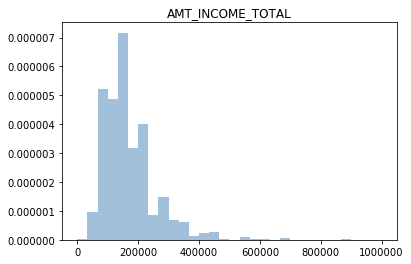

In [18]:
plt.hist(data["AMT_INCOME_TOTAL"], bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none',range=(0,1000000));
plt.title("AMT_INCOME_TOTAL")

In [19]:
data["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 1.0, 'Distribution of Target')

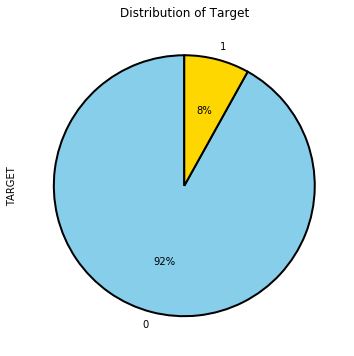

In [20]:
# 目標分布
plt.figure(figsize=(13,6))
plt.subplot(121)
data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"})
plt.title("Distribution of Target")

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

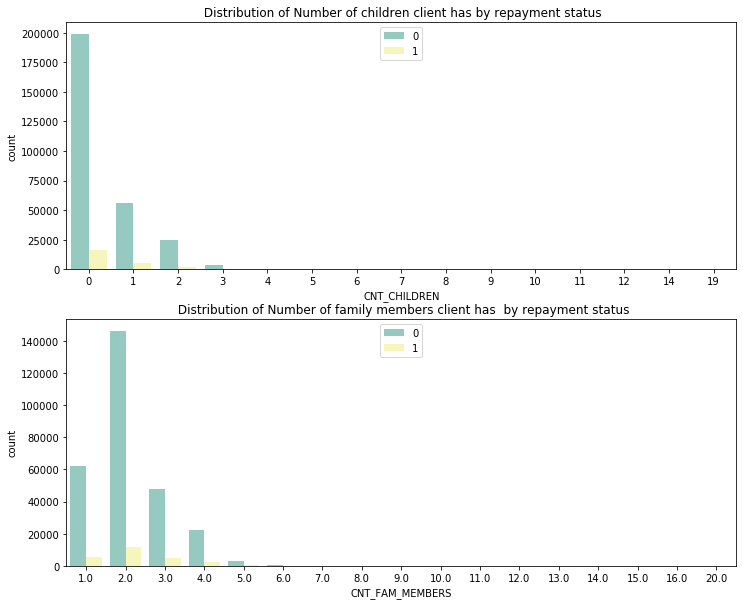

In [44]:
fig = plt.figure(figsize=(12,10))
# 客戶家中有幾個小孩
plt.subplot(211)
sns.countplot(data["CNT_CHILDREN"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has by repayment status")
# 客戶家中的成員
plt.subplot(212)
sns.countplot(data["CNT_FAM_MEMBERS"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

In [ ]:
# 自定

# 佔筆
def detail(column):
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    data[data["TARGET"]==0][column].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold","r","g","b"],startangle = 120,
                                                  wedgeprops={"linewidth":2,"edgecolor":"k"},)
    plt.title("Distribution of " + column + " for repayers")
    plt.subplot(122)
    data[data["TARGET"]==1][column].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold","r","g","b"],startangle = 120,
                                                  wedgeprops={"linewidth":2,"edgecolor":"k"},)
    plt.title("Distribution of " + column + " for defaulters")
    # 依收入型態觀察還款律，只取前面較多的四個分類
    sns.catplot(data=data,
                x=column,
                y="TARGET",
                kind="bar",
                height=10,
                order=data[column].value_counts().index[:4])

# 計次
def count(column):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sns.countplot(y=data[column],
                 palette="Set2",
                 order=data[column].value_counts().index[:5])
    plt.subplot(122)
    sns.countplot(y=data[column],
                 palette="Set1",
                  hue=data["CODE_GENDER"],
                 order=data[column].value_counts().index[:5])
    plt.title("Distribution of " + column)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace = .4)

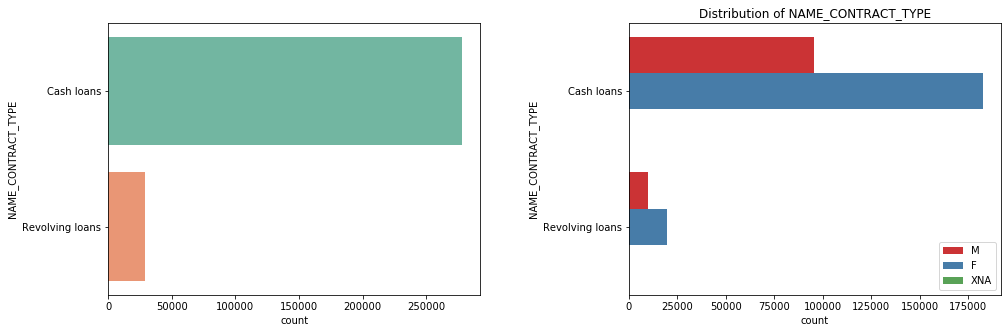

In [106]:
# 貸款類別
count("NAME_CONTRACT_TYPE")

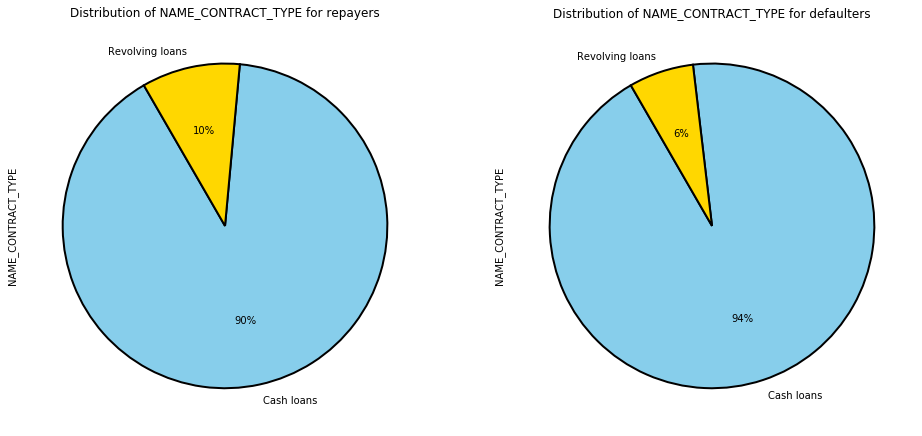

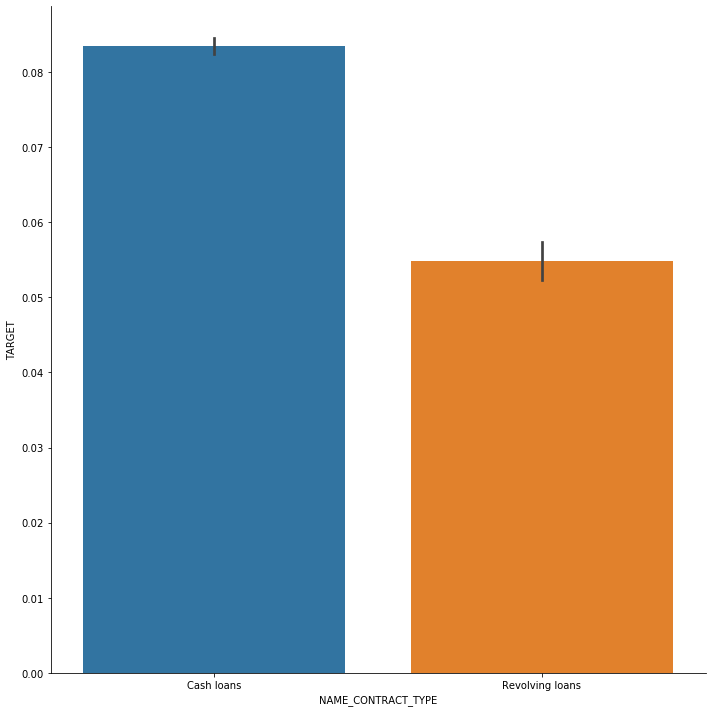

In [91]:
# 貸款類別
detail("NAME_CONTRACT_TYPE")

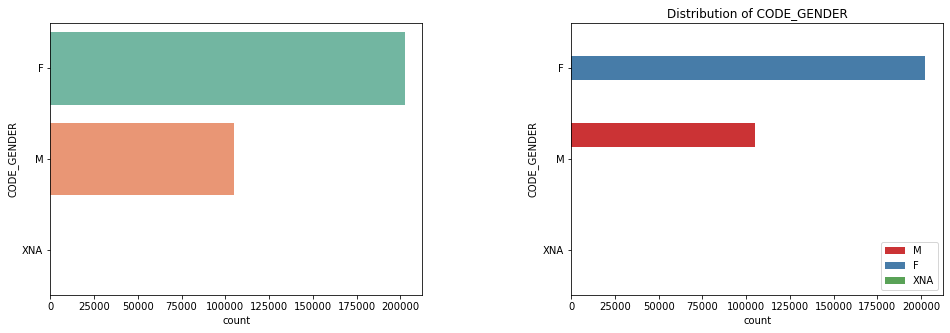

In [108]:
# 性別
count("CODE_GENDER")

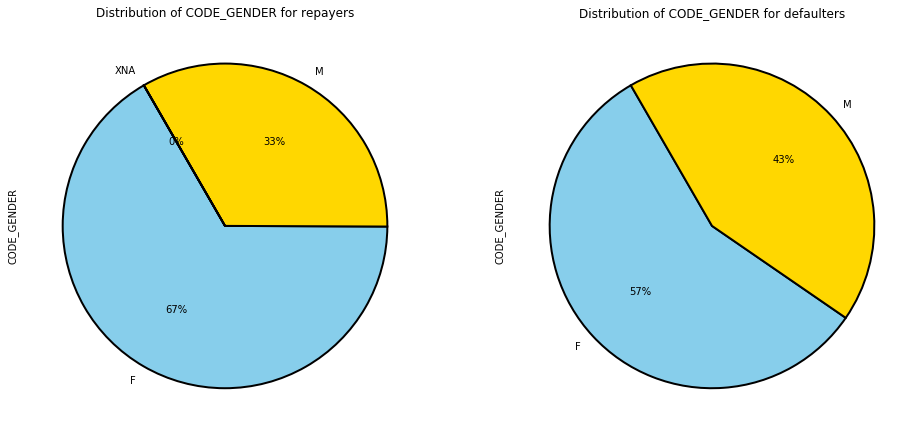

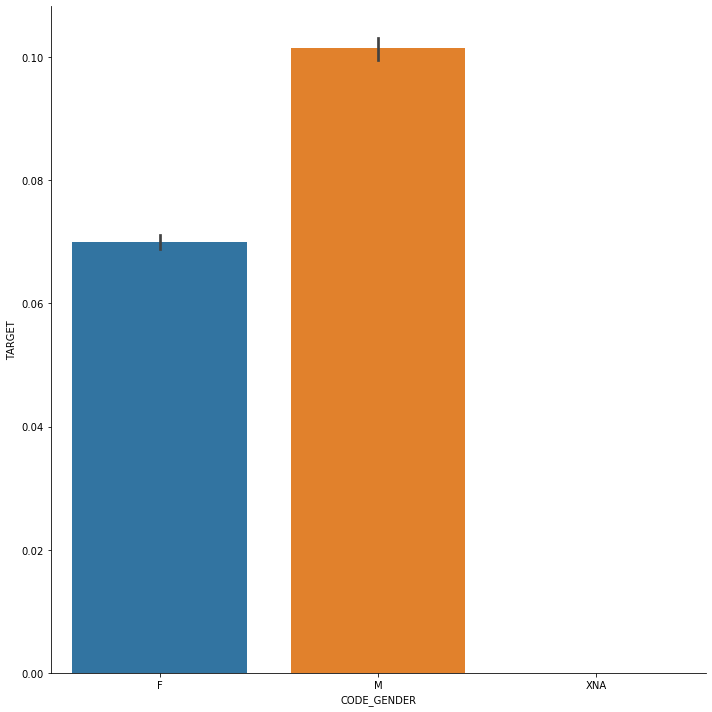

In [92]:
# 性別
detail("CODE_GENDER")

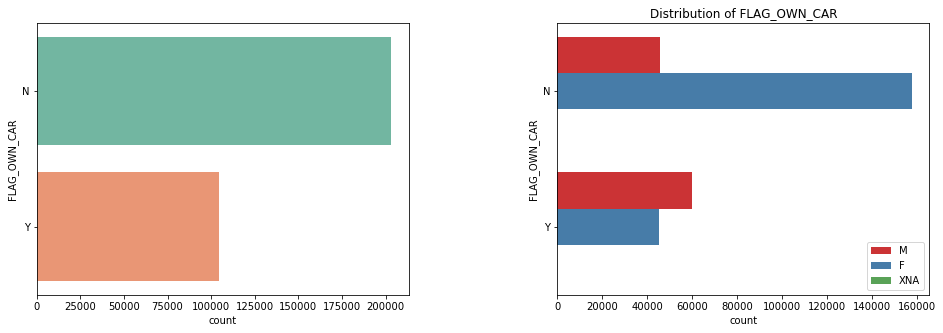

In [109]:
# 有車
count("FLAG_OWN_CAR")

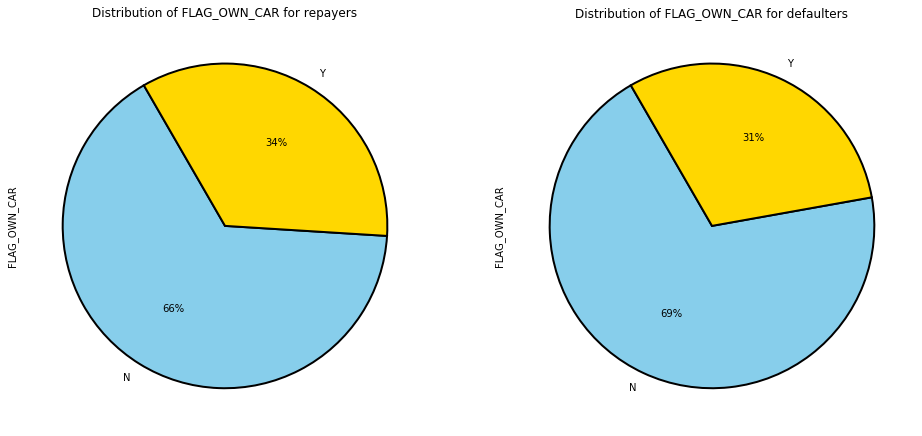

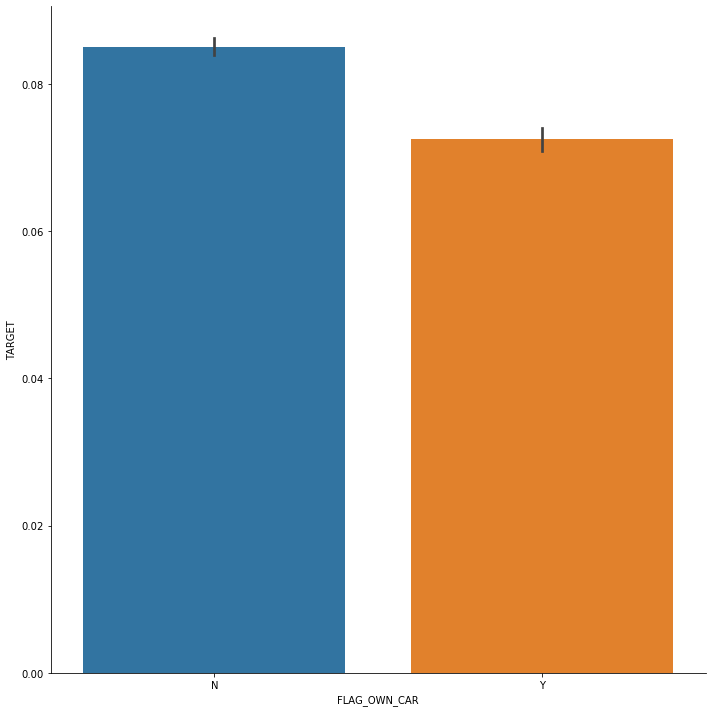

In [93]:
# 有車
detail("FLAG_OWN_CAR")

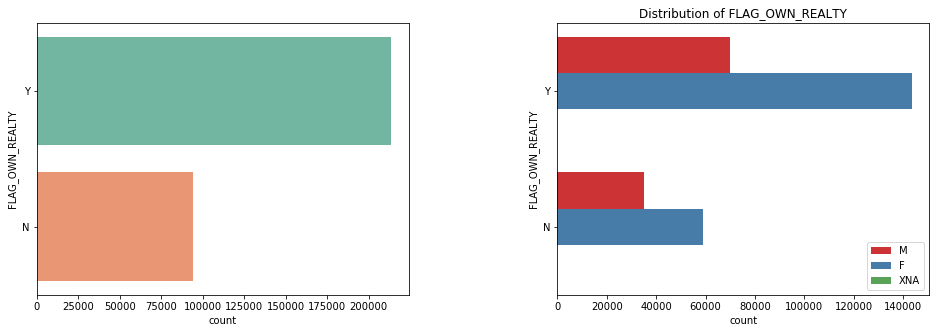

In [110]:
# 有房
count("FLAG_OWN_REALTY")

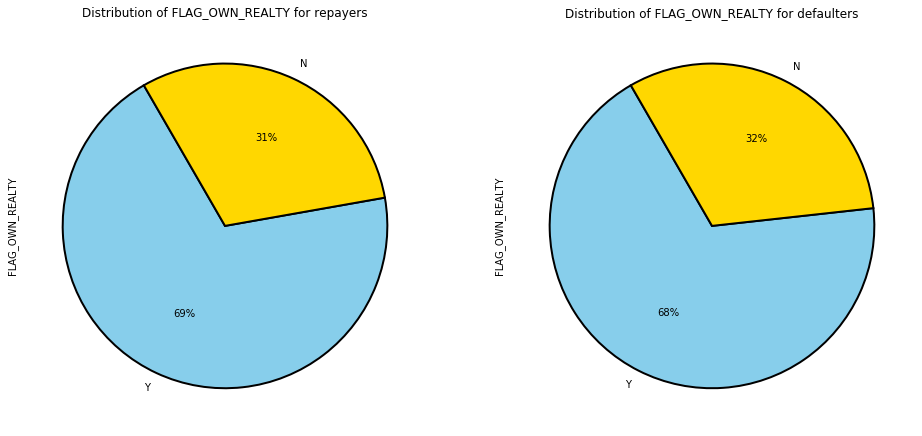

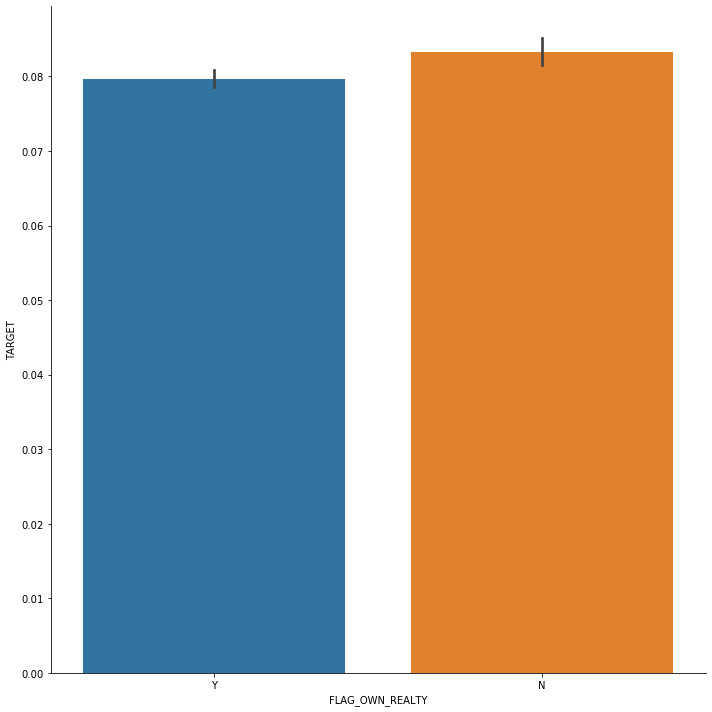

In [94]:
# 有房
detail("FLAG_OWN_REALTY")

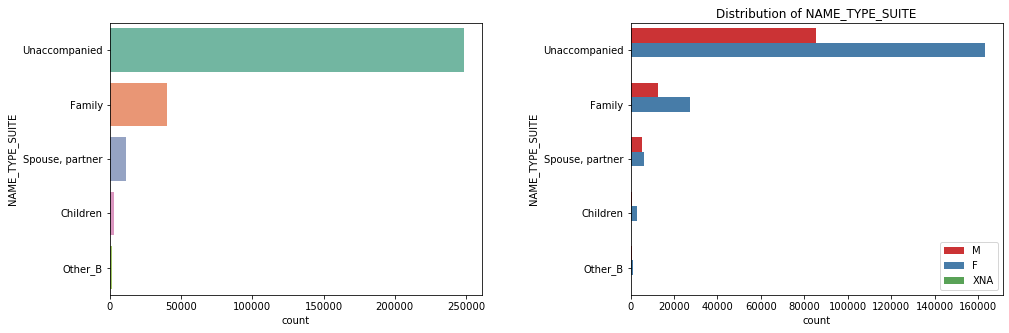

In [111]:
# 誰陪同
count("NAME_TYPE_SUITE")

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

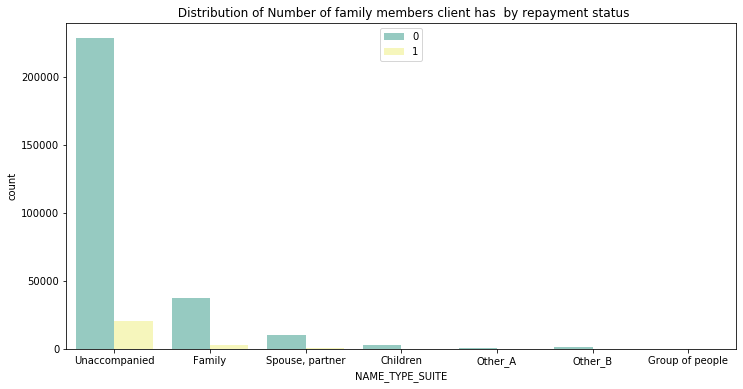

In [123]:
# 誰陪同
plt.figure(figsize=(12,6))
sns.countplot(data["NAME_TYPE_SUITE"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

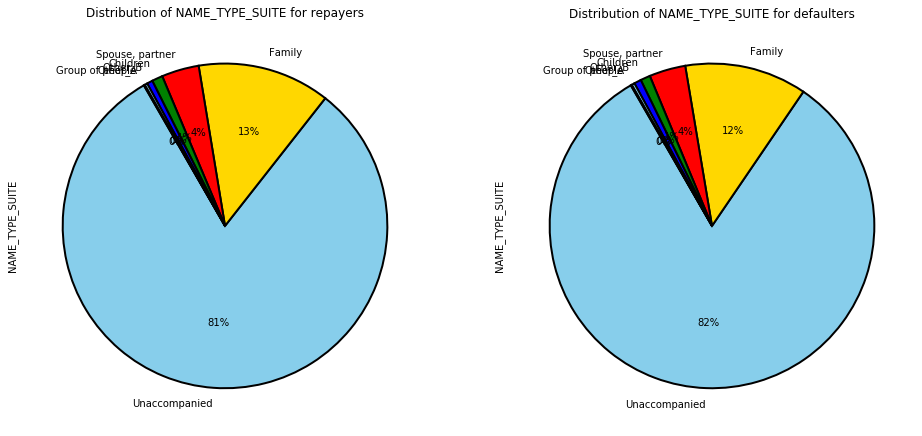

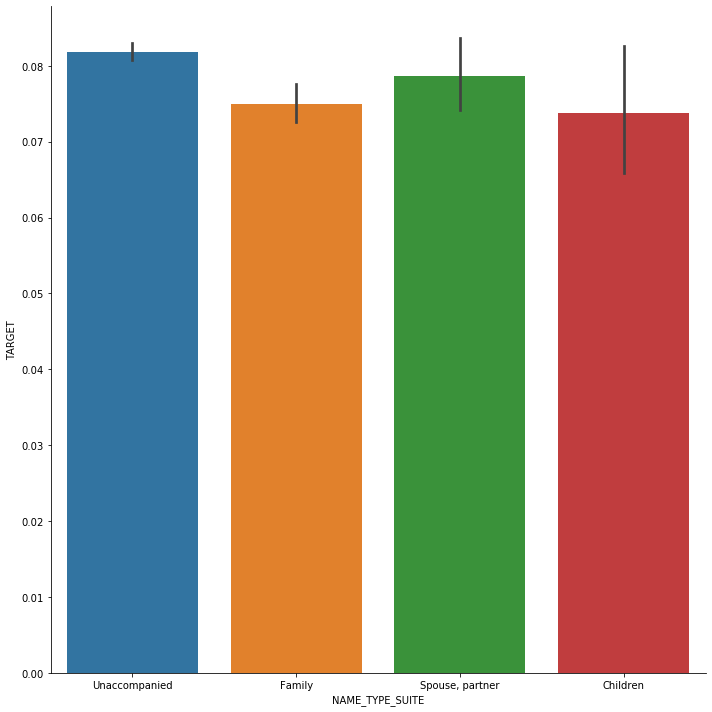

In [97]:
# 誰陪同
detail("NAME_TYPE_SUITE")

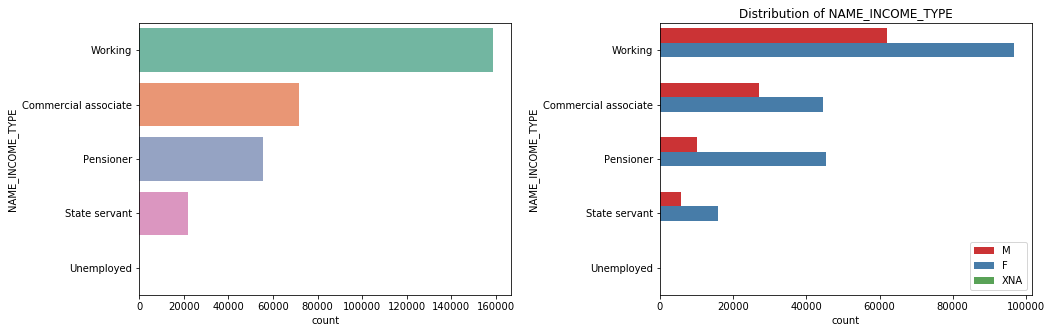

In [112]:
# 收入型態
count("NAME_INCOME_TYPE")

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

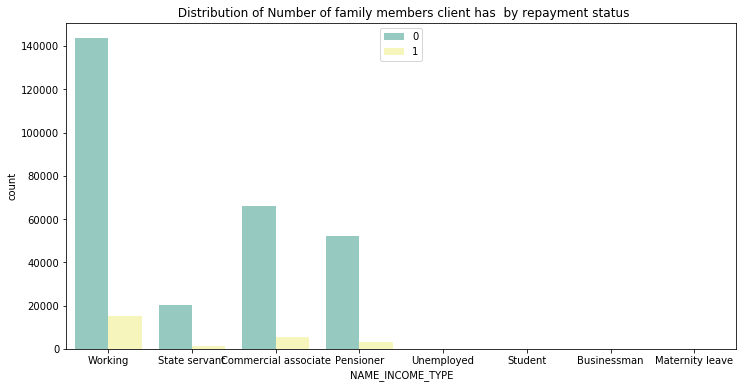

In [124]:
# 誰陪同
plt.figure(figsize=(12,6))
sns.countplot(data["NAME_INCOME_TYPE"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

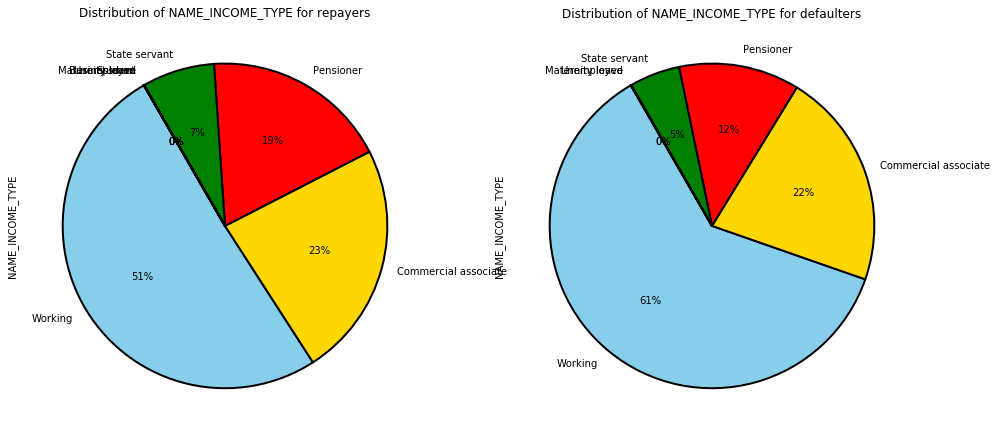

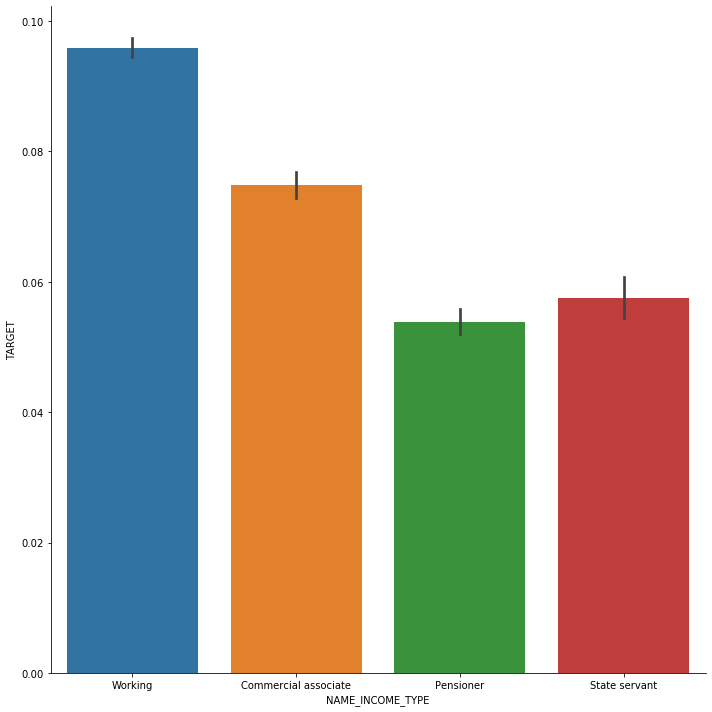

In [98]:
# 收入型態
detail("NAME_INCOME_TYPE")

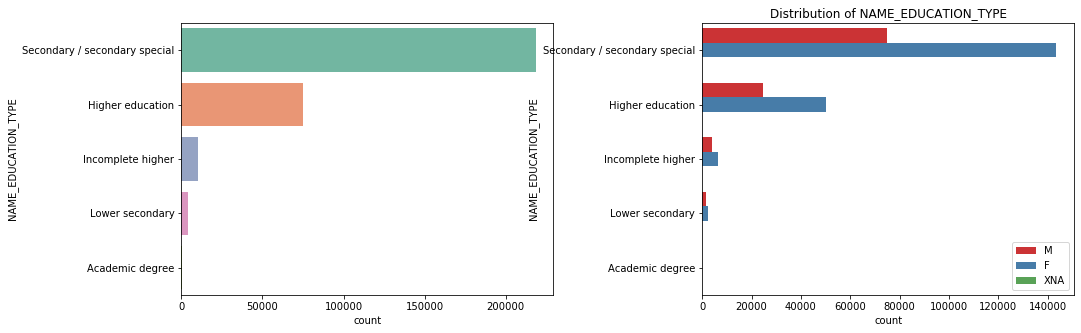

In [113]:
# 教育水平
count("NAME_EDUCATION_TYPE")

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

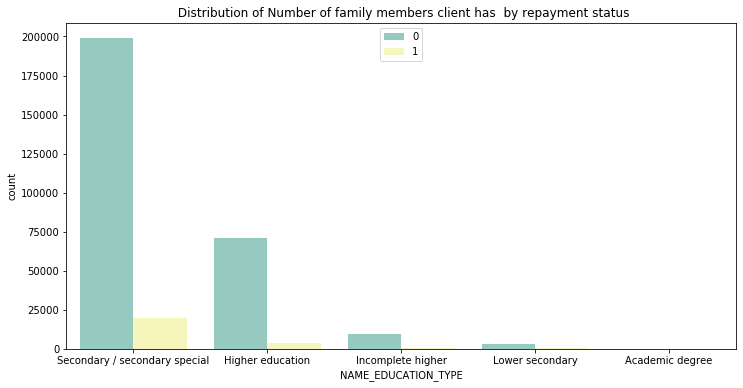

In [125]:
# 誰陪同
plt.figure(figsize=(12,6))
sns.countplot(data["NAME_EDUCATION_TYPE"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

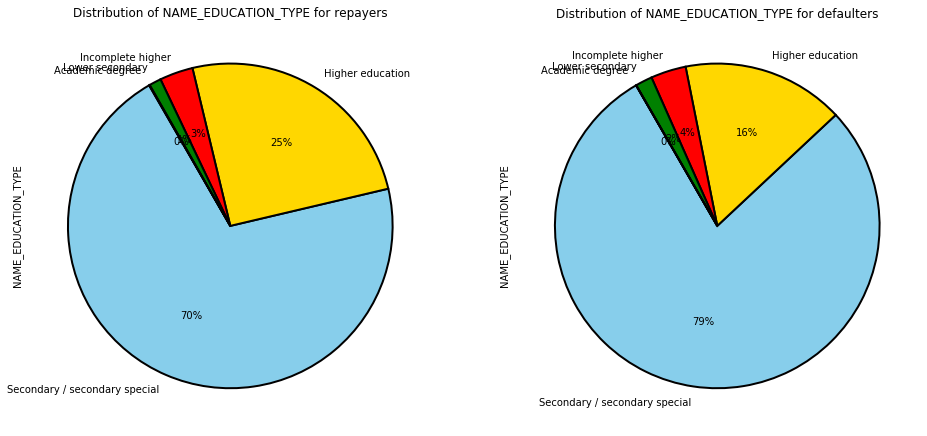

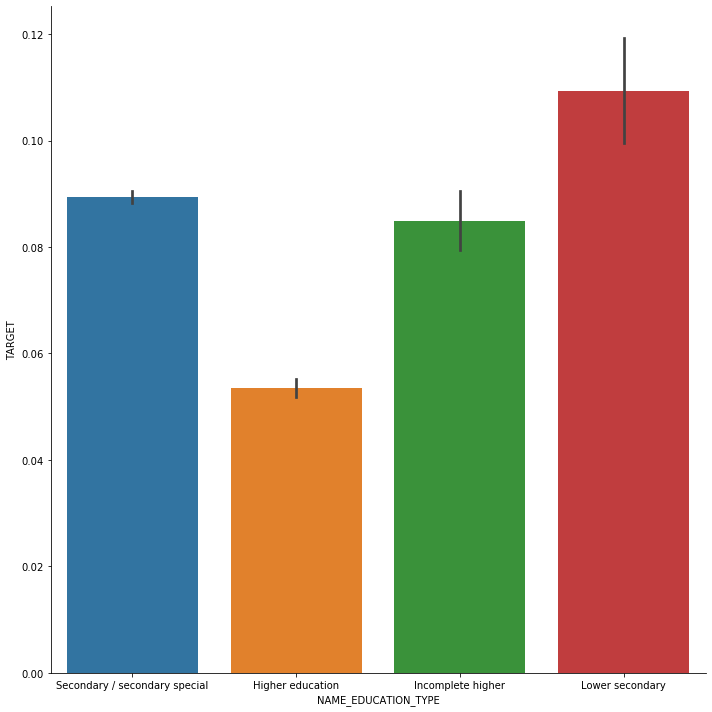

In [99]:
# 教育水平
detail("NAME_EDUCATION_TYPE")

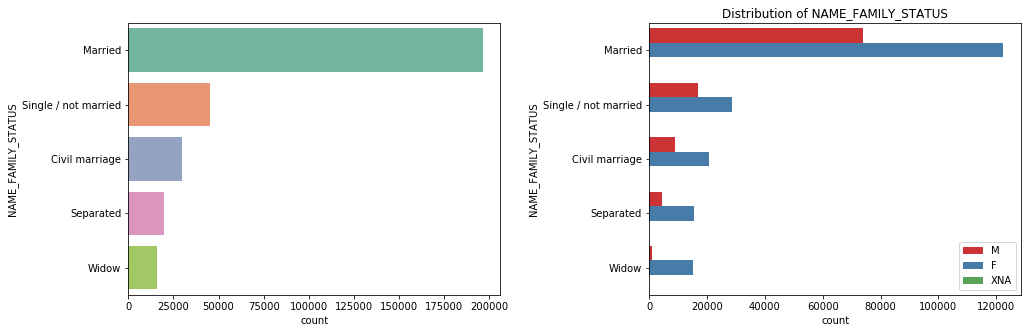

In [114]:
# 婚姻狀態
count("NAME_FAMILY_STATUS")

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

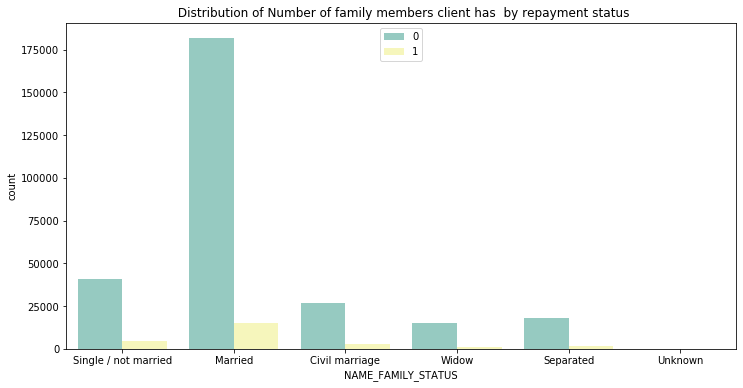

In [126]:
# 誰陪同
plt.figure(figsize=(12,6))
sns.countplot(data["NAME_FAMILY_STATUS"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

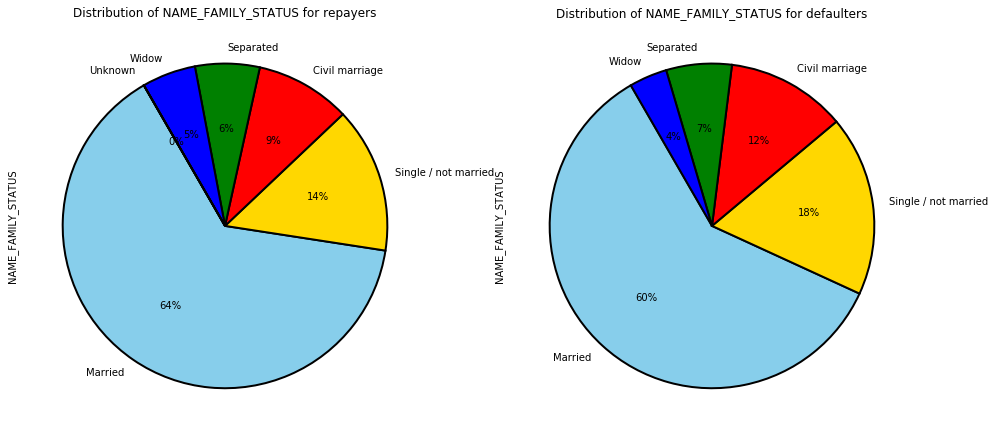

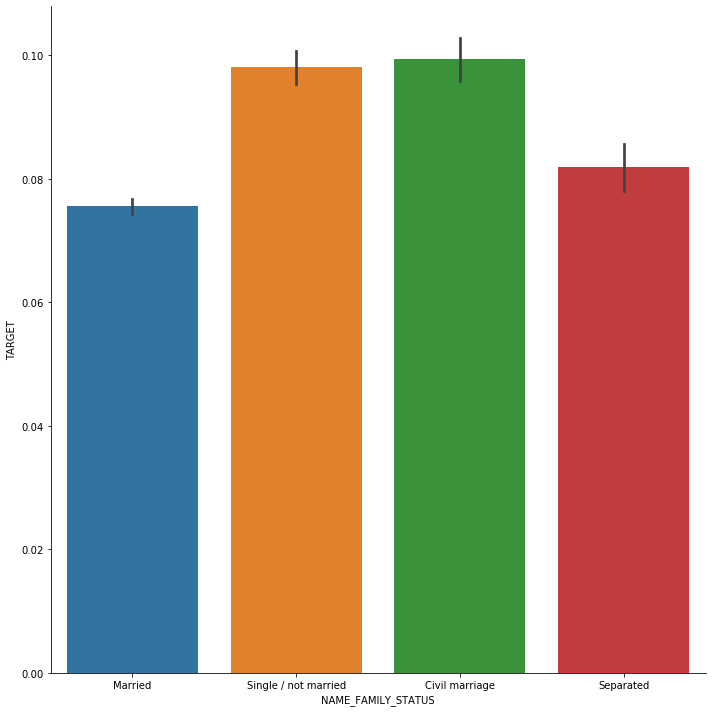

In [100]:
# 婚姻狀態
detail("NAME_FAMILY_STATUS")

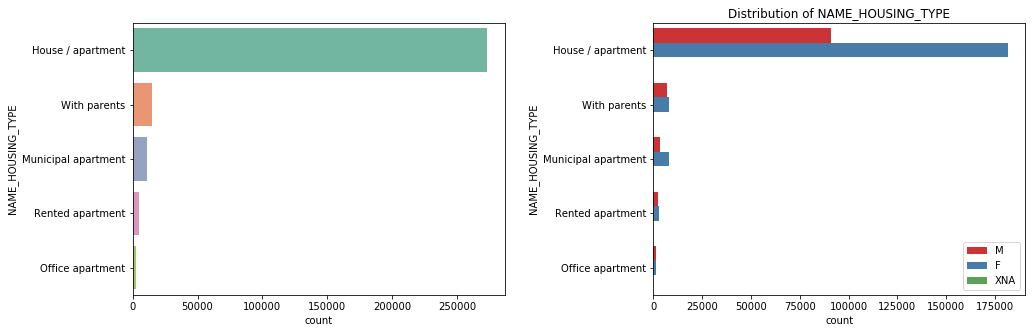

In [115]:
# 房子狀態
count("NAME_HOUSING_TYPE")

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

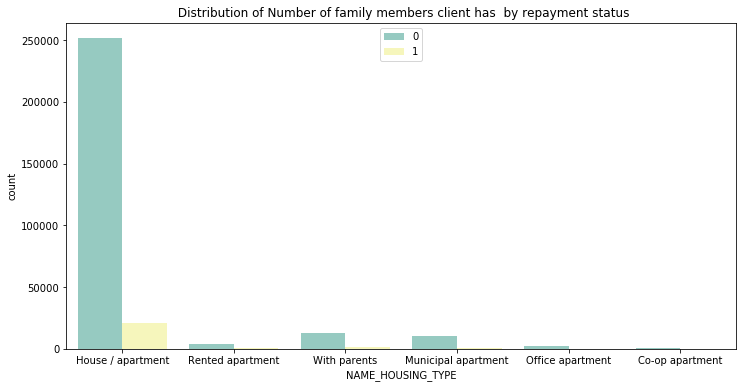

In [127]:
# 誰陪同
plt.figure(figsize=(12,6))
sns.countplot(data["NAME_HOUSING_TYPE"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

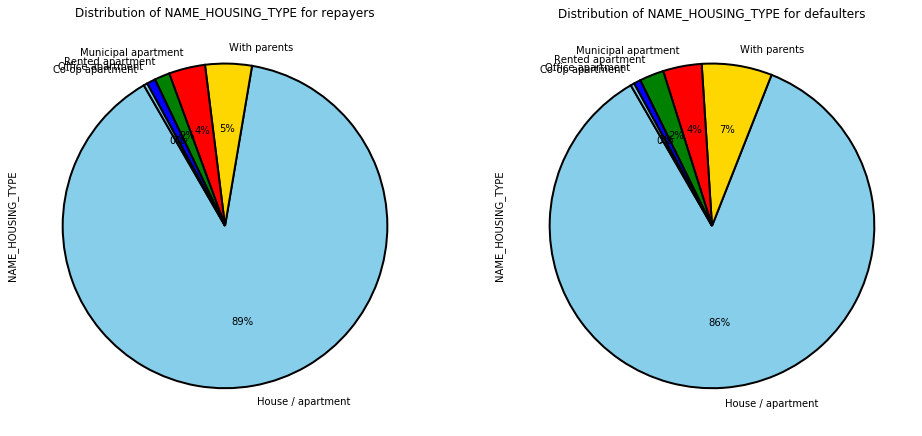

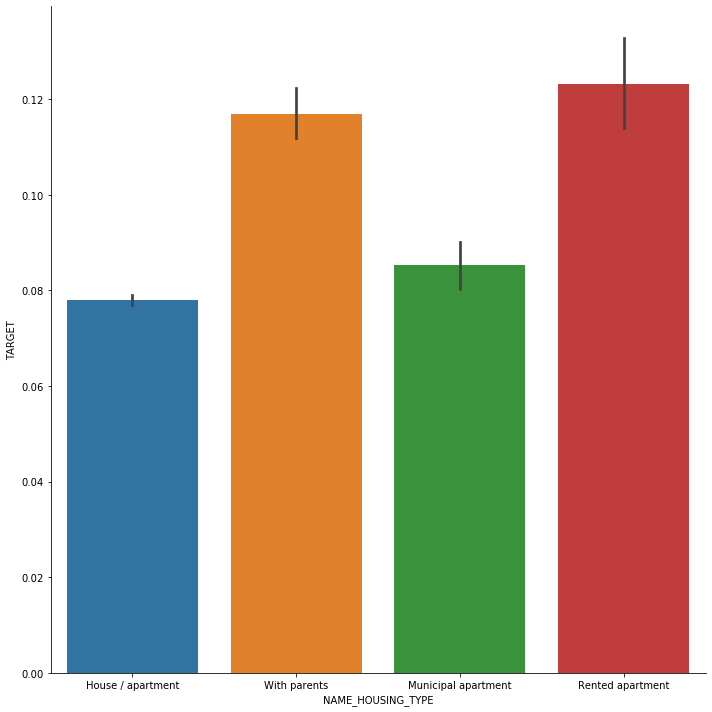

In [101]:
# 房子狀態
detail("NAME_HOUSING_TYPE")

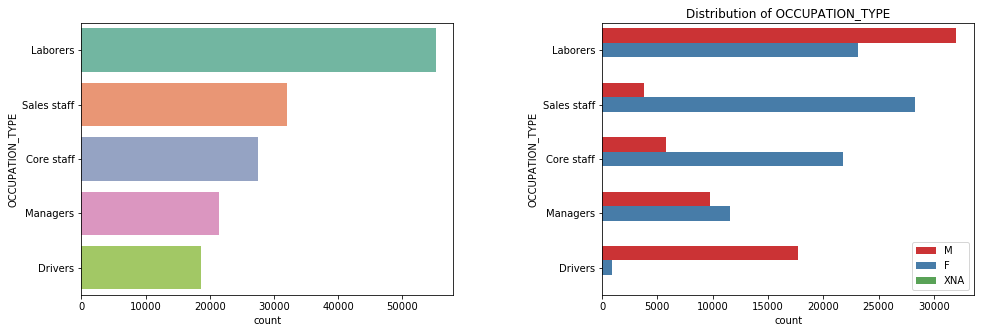

In [116]:
# 客戶職業
count("OCCUPATION_TYPE")

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

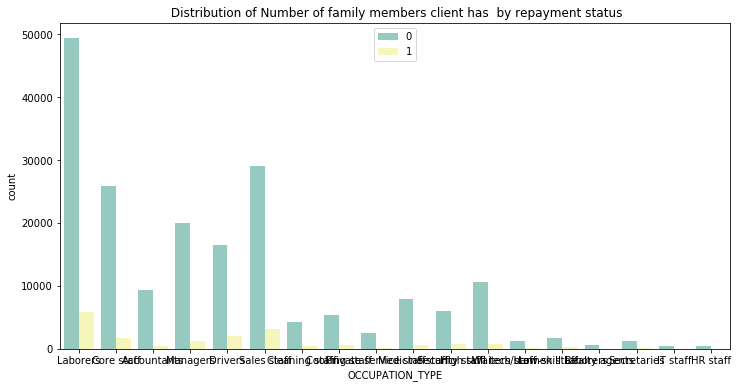

In [128]:
# 誰陪同
plt.figure(figsize=(12,6))
sns.countplot(data["OCCUPATION_TYPE"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

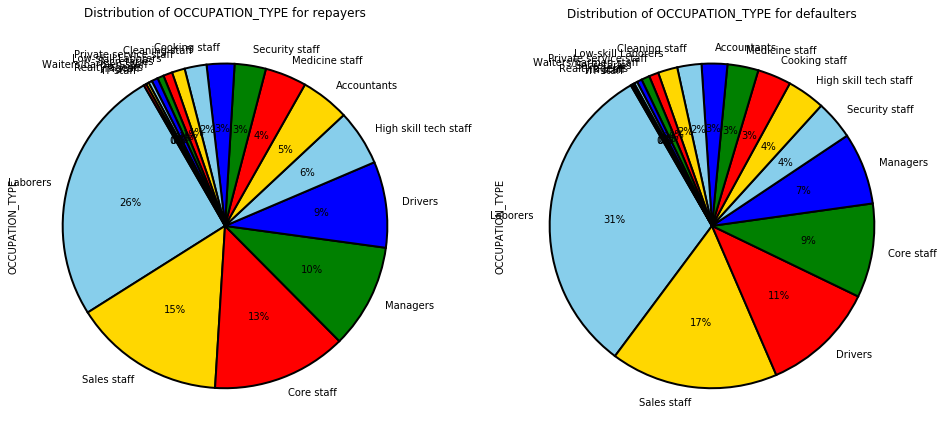

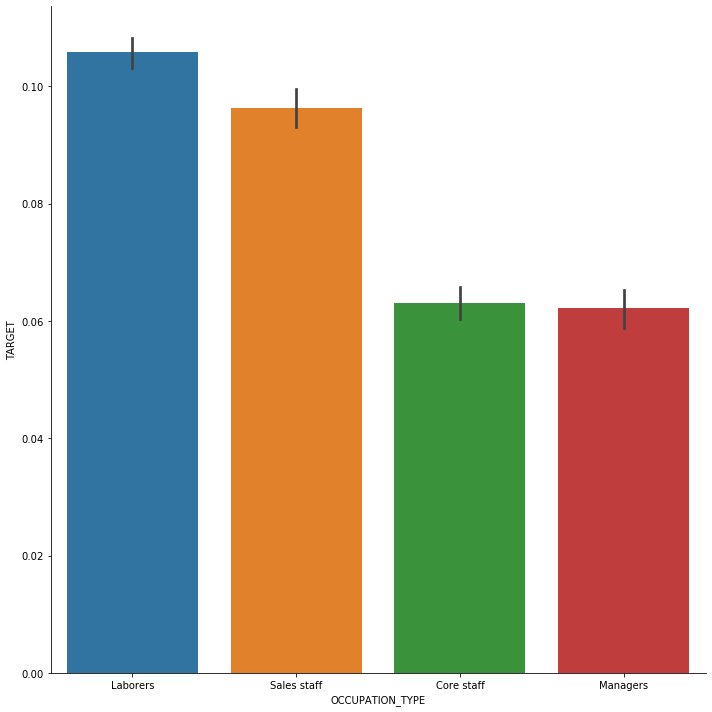

In [102]:
# 客戶職業
detail("OCCUPATION_TYPE")

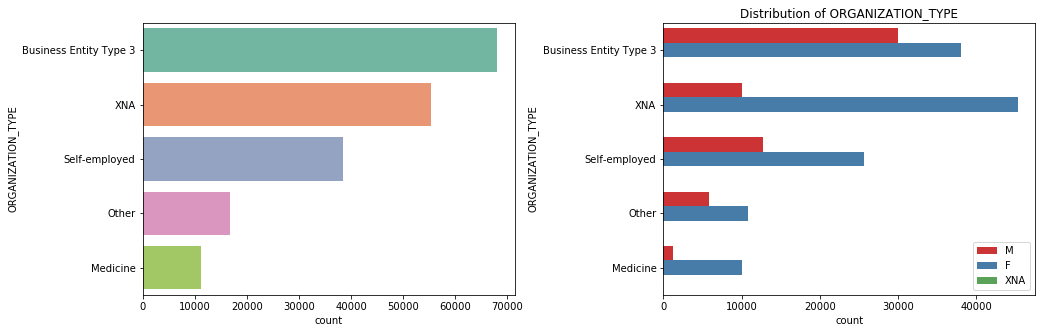

In [117]:
# 客戶組織型態
count("ORGANIZATION_TYPE")

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

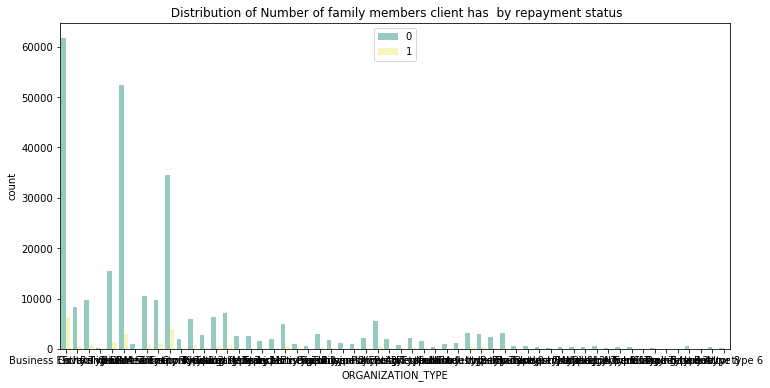

In [129]:
# 誰陪同
plt.figure(figsize=(12,6))
sns.countplot(data["ORGANIZATION_TYPE"],palette="Set3",hue=data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")

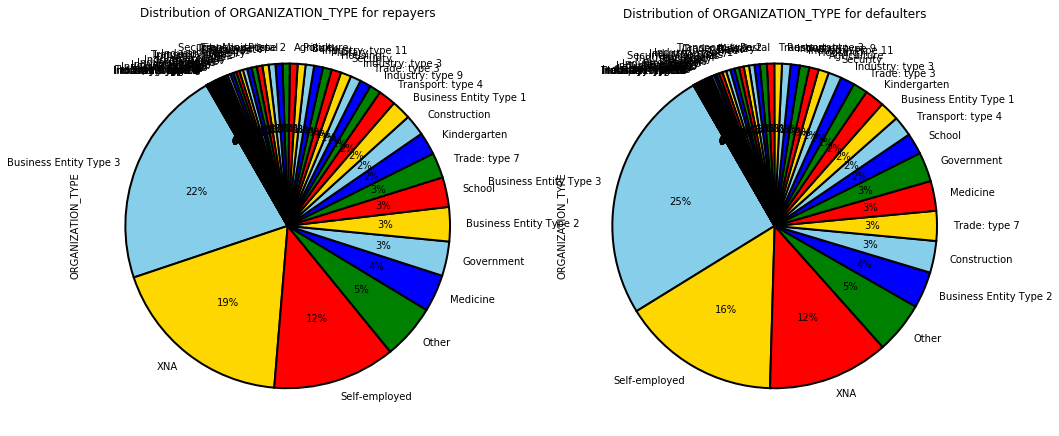

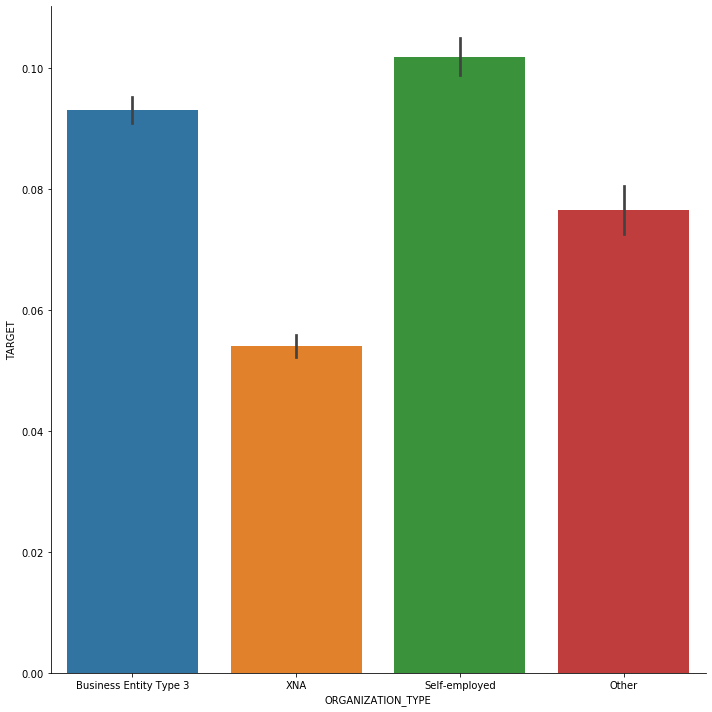

In [103]:
# 客戶組織型態
detail("ORGANIZATION_TYPE")

In [37]:
# Find correlations with the target and sort
correlations_2 = data.corr()['TARGET'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', correlations_2.tail(15))
print('\nMost Negative Correlations:\n', correlations_2.head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


Text(0.5, 1, 'Correlation between features')

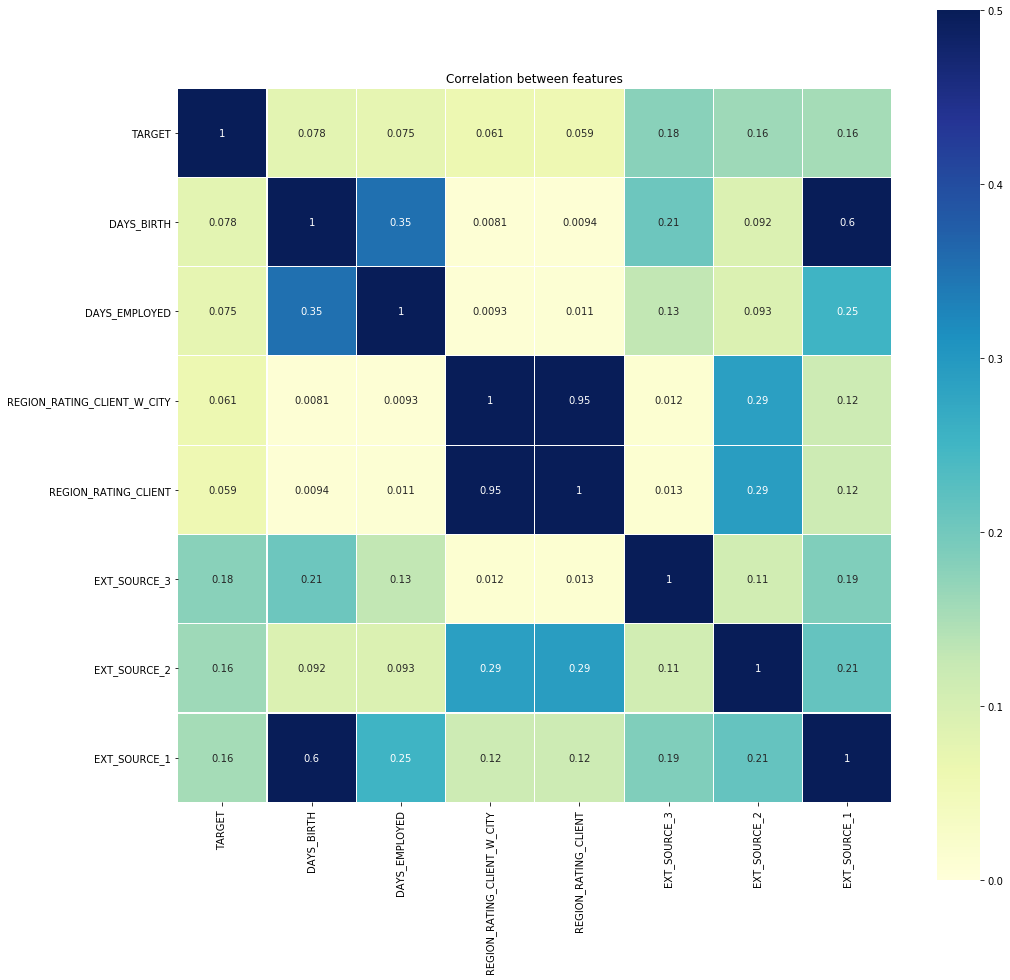

In [38]:
ext_data = data[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']]
correlations = ext_data.corr()
plt.figure(figsize=(16, 16))

sns.heatmap(np.abs(correlations), vmin=0, vmax=0.5, linewidths=0.05,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

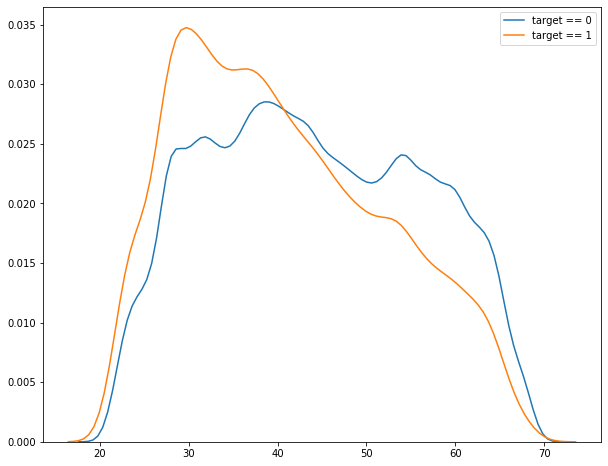

In [39]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')